In [ ]:
# Ensure TensorFlow is up to date
!pip install -q tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.2 which is incompatible.


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/cotton-disease-prediction-dataset-train/train'
valid_path = '/content/drive/MyDrive/cotton-disease-prediction-dataset-test/test'

In [ ]:
import os
print("Train path exists:", os.path.exists(train_path))
print("Valid path exists:", os.path.exists(valid_path))

if os.path.exists(train_path):
    print("Train directory contents:", os.listdir(train_path))
if os.path.exists(valid_path):
    print("Valid directory contents:", os.listdir(valid_path))


# Ensure there are images in the directories
print(f"Number of classes (train): {len(os.listdir(train_path))}")
print(f"Number of classes (valid): {len(os.listdir(valid_path))}")

Train path exists: True
Valid path exists: True
Train directory contents: ['fresh cotton plant', 'fresh cotton leaf', 'diseased cotton plant', 'diseased cotton leaf']
Valid directory contents: ['diseased cotton leaf', 'fresh cotton leaf', 'diseased cotton plant', 'fresh cotton plant']
Number of classes (train): 4
Number of classes (valid): 4


In [ ]:
# Import the Resnet 50 library as shown below and add preprocessing layer to the front of VGG
# Here we will b~e using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/cotton-disease-prediction-dataset-train/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,989,124 (91.51 MB)

 Trainable params: 401,412 (1.53 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cotton-disease-prediction-dataset-train/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cotton-disease-prediction-dataset-test/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
from glob import glob

# Useful for getting number of classes
folders = glob(train_path + '/*')
num_classes = len(folders)
print(f"Number of classes: {num_classes}")


# Print the class indices to ensure they are correct
print("Class indices:", training_set.class_indices)
print("Test class indices:", test_set.class_indices)

# Print a batch of data to check if it's being loaded correctly
batch = next(training_set)
print("Batch shape (inputs):", batch[0].shape)
print("Batch shape (labels):", batch[1].shape)
print("Batch labels (sample):", batch[1])

Number of classes: 4
Class indices: {'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}
Test class indices: {'diseased cotton leaf': 0, 'diseased cotton plant': 1, 'fresh cotton leaf': 2, 'fresh cotton plant': 3}
Batch shape (inputs): (32, 224, 224, 3)
Batch shape (labels): (32, 4)
Batch labels (sample): [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
# Determine steps per epoch and validation steps
steps_per_epoch = training_set.samples // training_set.batch_size
validation_steps = test_set.samples // test_set.batch_size

In [ ]:
# fit the model
# Run the cell. It will take some time to execute

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=steps_per_epoch,
  validation_steps=validation_steps
)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 344s 6s/step - accuracy: 0.6043 - loss: 1.0096 - val_accuracy: 0.5556 - val_loss: 1.3630
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.5000 - loss: 1.3261 - val_accuracy: 0.5556 - val_loss: 1.0322
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 342s 6s/step - accuracy: 0.5987 - loss: 0.9768 - val_accuracy: 0.7222 - val_loss: 0.7542
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.6875 - loss: 0.7474 - val_accuracy: 0.5556 - val_loss: 0.8408
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 341s 6s/step - accuracy: 0.6587 - loss: 0.8336 - val_accuracy: 0.6111 - val_loss: 1.1939
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.8438 - loss: 0.4533 - val_accuracy: 0.6111 - val_loss: 1.2149
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 341s 6s/step - accuracy: 0.6127 - loss: 1.0292 - val_accuracy: 0.6667 - val_loss: 1.2717
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.5625 - loss: 1.2784 - val_accuracy: 0.6667 

In [ ]:
import matplotlib.pyplot as plt

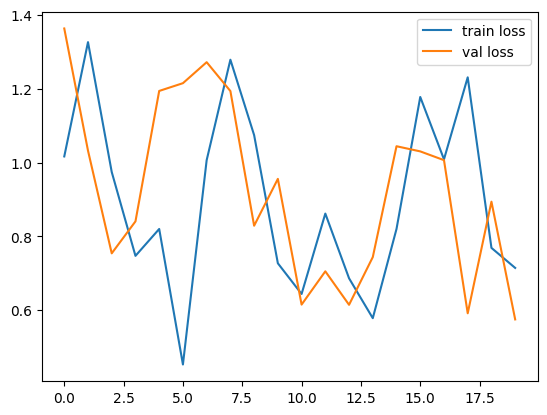

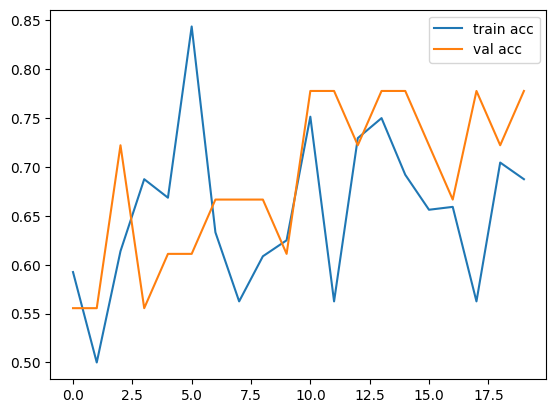

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [ ]:
y_pred

array([[1.5972961e-02, 3.1489797e-03, 9.7836173e-01, 2.5164427e-03],
       [1.9909142e-02, 1.6431261e-02, 9.2615777e-01, 3.7501790e-02],
       [4.3202657e-03, 3.7985599e-01, 2.8453926e-02, 5.8736986e-01],
       [3.5656507e-03, 2.2705283e-03, 9.8892671e-01, 5.2369726e-03],
       [3.6929395e-02, 7.1823210e-01, 8.4291250e-03, 2.3640934e-01],
       [2.9934184e-03, 9.3564636e-01, 1.9247180e-02, 4.2112999e-02],
       [1.3514289e-03, 9.8100656e-01, 9.1867107e-05, 1.7550075e-02],
       [2.1563859e-03, 9.4262642e-01, 1.1878415e-04, 5.5098392e-02],
       [1.1005683e-02, 3.3800301e-01, 5.2475166e-02, 5.9851617e-01],
       [8.6038798e-02, 6.0628068e-01, 2.3336783e-01, 7.4312717e-02],
       [3.6880889e-03, 8.4151924e-01, 1.2667969e-02, 1.4212465e-01],
       [1.3378146e-01, 2.5177168e-04, 6.3134827e-02, 8.0283195e-01],
       [1.0616868e-02, 1.9985815e-05, 9.8933524e-01, 2.7819335e-05],
       [3.1214032e-01, 5.7235497e-01, 1.6381953e-02, 9.9122711e-02],
       [1.9883525e-03, 2.3388673e-

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 2, 3, 2, 1, 1, 1, 1, 3, 1, 1, 3, 2, 1, 3, 3, 0, 2])